<a href="https://colab.research.google.com/github/Pontes-y/fiap/blob/main/fase7_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

In [112]:
# Criando dataframes
usuarios = pd.read_csv('BX-Users.csv', encoding='ISO-8859-1')

livros = pd.read_csv('BX-Books.csv', encoding='ISO-8859-1')

avalizacoes = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='ISO-8859-1')

<ipython-input-112-6b921b98299e>:4: DtypeWarning: Columns (3,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  livros = pd.read_csv('BX-Books.csv', encoding='ISO-8859-1')


In [113]:
# Join entre as tableas
merged_data = pd.merge(usuarios, avalizacoes, left_on='User-ID', right_on='User-ID', how='inner')

merged_data = pd.merge(merged_data, livros, left_on='ISBN', right_on='ISBN', how='inner')

merged_data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,8.0,"timmins, ontario, canada",NaN,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,NaN,NaN,NaN
1,8.0,"timmins, ontario, canada",NaN,080652121X,0,Hitler's Secret Bankers: The Myth of Swiss Neu...,Adam Lebor,2000,Citadel Press,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,http://images.amazon.com/images/P/080652121X.0...,NaN,NaN,NaN
2,8.0,"timmins, ontario, canada",NaN,1552041778,5,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,NaN,NaN,NaN
3,8.0,"timmins, ontario, canada",NaN,1558746218,0,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,NaN,NaN,NaN
4,3363.0,"knoxville, tennessee, usa",29.0,1558746218,0,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,http://images.amazon.com/images/P/1558746218.0...,NaN,NaN,NaN


In [114]:
# Amostragem aleatória dos dados
df_amostra = merged_data.sample(frac=0.01, random_state=42)

In [115]:
# Grado direcionado
G = nx.DiGraph()

In [116]:
# Adicionando nós e arestas ao grafo a partir do DataFrame
for index, row in df_amostra.iterrows():
    # Nó de usuário
    G.add_node(row['User-ID'], label=f"Usuário {row['User-ID']}\nIdade: {row['Age']}\nLocalização: {row['Location']}")

    # Nó de livro
    G.add_node(row['ISBN'], label=f"Livro {row['ISBN']}\nTítulo: {row['Book-Title']}\nAutor: {row['Book-Author']}")

    # Aresta de usuário para livro com a avaliação como atributo
    G.add_edge(row['User-ID'], row['ISBN'], avaliacao=row['Book-Rating'])

In [117]:
# Detecção de comunidades usando Girvan-Newman
communities = girvan_newman(G)

In [118]:
# Obter as comunidades
node_communities = {}
for i, community in enumerate(next(communities)):
    for node in community:
        node_communities[node] = i

In [119]:
# Atributos de comunidade
nx.set_node_attributes(G, node_communities, 'community')

In [120]:
# Execustar a construção do grafo
pos = nx.spring_layout(G)
node_colors = [G.nodes[node]['community'] for node in G.nodes]
labels = nx.get_edge_attributes(G, 'avaliacao')

<ipython-input-122-a46f7abc7d68>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw(G, pos, with_labels=True, font_size=8, node_color=node_colors, cmap=plt.cm.get_cmap('viridis'), font_color='black', font_weight='bold')


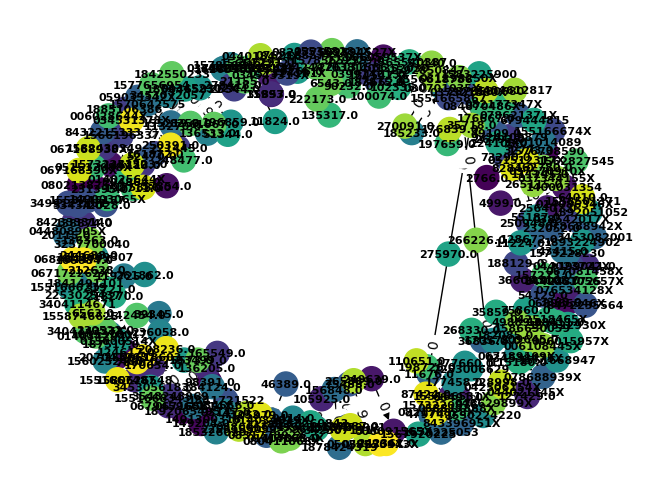

In [122]:
# Adiciona cores diferentes para as comunidades
nx.draw(G, pos, with_labels=True, font_size=8, node_color=node_colors, cmap=plt.cm.get_cmap('viridis'), font_color='black', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()